In [1]:
### Raman Spectrum Analysis - Adaline Farrow 2024

# import stuff
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from scipy.optimize import *
from scipy.signal import *

## Functions (Only Change If Needed)

In [2]:
def plot(cwd, filename, peak_height):
    # Shorten variable - didn't feel like changing all instances of h
    h = peak_height
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    # Read specified file using pandas library, convert to numpy array for easy manipulation
    df = np.array(pd.read_csv(filename+'.txt', sep = '\t'))
    x = df[:,0]   
    y = df[:,1]   # Set x and y values to frequency, counts respectively
    
    dopeaks(x, y, h) # Exectute dopeaks function
    
    # Plot values, label axes using matplotlib.pyplot library
    plt.ylim(min(y)+(min(y)*0.5), max(y)+(max(y)*0.5))
    plt.plot(x, y, 'r-', linewidth = 0.5)
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    
def colplot(cwd, filename):
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    # Read specified file using pandas library, convert to numpy array for easy manipulation
    df = np.array(pd.read_csv(filename+'.txt', sep = '\t'))
    x = df[250:700,0]
    y = df[250:700,1]   # Set x and y values to frequency, counts respectively
    
    smallpeaks(x, y, 1) # Trim array to collagen ROI (~700-1800 cm-1), run smallpeaks function
    
    # Plot values, label axes using matplotlib.pyplot library
    plt.ylim(min(y)+(min(y)*0.5), max(y)+(max(y)*0.5))
    plt.plot(x, y, 'r-', linewidth = 0.5)
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    
def custplot(cwd, filename, domain, peak_height):
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    # Read specified file using pandas library, convert to numpy array for easy manipulation
    df = np.array(pd.read_csv(filename+'.txt', sep = '\t'))    
    x = df[:,0]
    y = df[:,1]   # Set x and y values to frequency, counts respectively
    
    x0 = list(x).index(min(x, key=lambda x:abs(x-domain[0])))
    x1 = list(x).index(min(x, key=lambda x:abs(x-domain[1])))
    
    smallpeaks(x[x0:x1], y[x0:x1], peak_height) # Trim array to collagen ROI (~700-1800 cm-1), run smallpeaks function
    
    # Plot values, label axes using matplotlib.pyplot library
    plt.ylim(min(y)+(min(y)*0.5), max(y)+(max(y)*0.5))
    plt.plot(x[x0:x1], y[x0:x1], 'r-', linewidth = 0.5)
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    
def multiplot(cwd):
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    
    for i in os.listdir(): # For every file in the current working directory,
        df = np.array(pd.read_csv(i, sep = '\t')) # Read file, convert to numpy array
        x = df[:,0]
        y = df[:,1]   # Set x and y values to frequency, counts respectively
        
        plt.plot(x, y, linewidth = 0.5, label = f'{i}') # Plot values, label series as file name
        
    # Label axes, create legend using matplotlib.pyplot library
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    plt.legend(loc='best', fontsize = 10)
    
def normplot(cwd):
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    
    for i in os.listdir(): # For every file in the current working directory,
        df = np.array(pd.read_csv(i, sep = '\t')) # Read file, convert to numpy array
        x = df[:,0]
        y = df[:,1]   # Set x and y values to frequency, counts respectively
        
        plt.plot(x, y/(max(y[100:])), linewidth = 0.5, label = f'{i}') # Plot values, label series as file name
        
    # Label axes, create legend using matplotlib.pyplot library
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    plt.legend(loc='best', fontsize = 10)
    
def multicolplot(cwd, do_peaks, peak_height, v_offset):
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    
    for i, j in zip(os.listdir(), range(len(os.listdir()))): # For every file in the current working directory,
        df = np.array(pd.read_csv(i, sep = '\t')) # Read file, convert to numpy array
        x = df[350:700,0]
        y = df[350:700,1]   # Set x and y values to frequency, counts respectively
        
        if do_peaks:
            smallpeaks(x, y, max(y)/6, v_offset*j)
        
        plt.plot(x, y+(v_offset*j), linewidth = 0.5, label = f'{(i.split(".",1)[0][:])}') # Plot values, label series as file name
      
    
    # Label axes, create legend using matplotlib.pyplot library
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    plt.legend(loc='best', fontsize = 10)
    
def custmultiplot(cwd, domain):
    # Use os library to set current working directory based on specified input folder
    os.chdir(cwd)
    
    for i in os.listdir(): # For every file in the current working directory,
        df = np.array(pd.read_csv(i, sep = '\t')) # Read file, convert to numpy array
        
        x = df[:,0]
        y = df[:,1]   # Set x and y values to frequency, counts respectively
        
        x, y = list(x), list(y)

        x0 = x.index(min(x, key=lambda x:abs(x-domain[0])))
        x1 = x.index(min(x, key=lambda x:abs(x-domain[1])))
        
        plt.plot(x[x0:x1], y[x0:x1]/(max(y[100:])), linewidth = 0.5, label = f'{(i.split(".",1)[0][:])}') # Plot values, label series as file name
        
    # Label axes, create legend using matplotlib.pyplot library
    plt.xlabel('wavenumber (cm$^{-1}$)', size = 13)
    plt.ylabel('Counts', size = 13)
    plt.legend(loc='best', fontsize = 10)
    
def save(folder, filename):
    # Set current working directory based on specified output folder
    os.chdir(folder)
    # Save figure as high res png with specified file name
    plt.savefig(filename+'.png', dpi=500)
    
def dopeaks(x, y, h):
    # Find list of peaks using scipy.signal.find_peaks, parameters determined by trial and error
    peaks, _ = find_peaks(y, height = h, distance = 20, prominence = 5)
    
    # Plot small black line above calculated peaks
    plt.plot(x[peaks]-5, y[peaks]+max(y[peaks]*0.03), 'k|')
    
    for i in peaks: # For every calculated peak value,
        # Label peak with frequency
        plt.text(x[i]-45, y[i]+max(y[peaks]*0.1), f'{np.round(x[i],1)}', fontsize = 8, rotation = 'vertical')
        
def smallpeaks(x, y, peak_height, offset): # ONLY FOR COLLAGEN ROI - MORE SENSITIVE PEAK PICKING
    # Find list of peaks, parameters determined by trial and error
    peaks, _ = find_peaks(y, height = peak_height, distance = 1, prominence = 0.5)
    
    # Plot small black line above calculated peaks
    plt.plot(x[peaks], y[peaks]+max(y[peaks]*0.05)+offset, 'k|')
    
    for i in peaks:# For every calculated peak value,
        # Label peak with frequency
        plt.text(x[i]-5, y[i]+max(y[peaks]*0.15)+offset, f'{np.round(x[i],1)}', fontsize = 8, rotation = 'vertical')


## Raman Spectrum Analysis

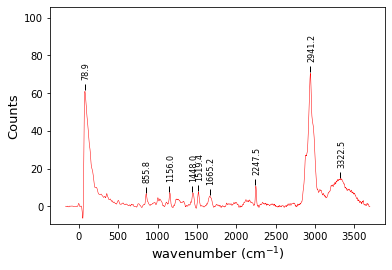

In [15]:
"""
Func: plot
Input: (file directory:str, filename:str, peak height:float)
Output: Plot of Raman spectrum with labeled notable peaks
Returns: None
"""
plot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-27', 'SC_PTB_002', peak_height=3)

###########################################################################################################################
"""
Func: save
Input: (output folder directory:str, desired filename:str) - WILL ADD .png AUTOMATICALLY
Output: High-res png to specified folder
Returns: None
"""
save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-27/plots', 'SC_PTB_002')

## Collagen ROI Analysis

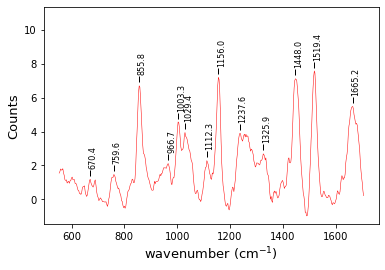

In [16]:
"""
Func: colplot
Input: (folder directory:str, filename:str)
Output: Plot of Raman spectrum with labeled notable peaks - CUT TO COLLAGEN ROI
Returns: None
"""
colplot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-27', 'SC_PTB_002')

###########################################################################################################################
save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-27/plots', 'SC_PTB_002_CROI')

## Custom ROI Analysis

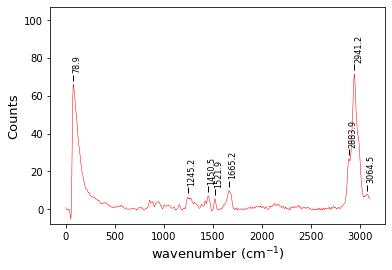

In [5]:
"""
Func: custplot
Input: (folder directory:str, domain[x0:float, x1:float], peak_height:float)
Output: Overlaid Raman spectra of all files in specified folder over specified domain with 
        labeled peaks of specified height
Returns: None
"""
custplot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-14 Data', 'gu_S1_ps_003'
            , domain=[0, 3100], peak_height = 5)

###########################################################################################################################

save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/plots/24-06-13', 'gucust')

## Raman Multiplot

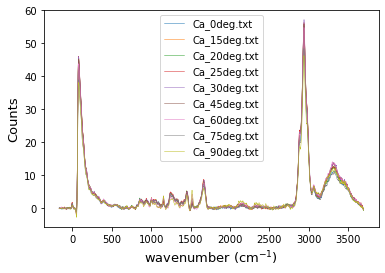

In [6]:
"""
Func: multiplot
Input: (folder directory:str)
Output: Overlaid Raman spectra of all files in specified folder
Returns: None
"""
multiplot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-14 Data/capol')

###########################################################################################################################
save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/plots/24-06-13', 'multica')

## Collagen ROI Multiplot

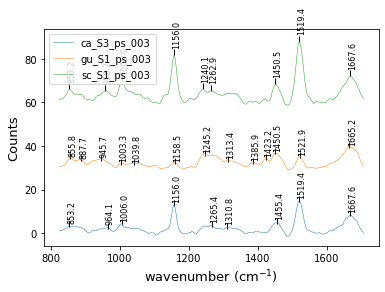

In [3]:
"""
Func: multicutplot
Input: (folder directory:str)
Output: Overlaid Raman spectra of all files in specified folder over collagen ROI
Returns: None
"""
multicolplot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-14 Data/point scans'
             , do_peaks=True, peak_height = 3, v_offset = 30)

###########################################################################################################################
save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/plots/24-06-13', 'multiplot_CROI')

## Custom ROI Multiplot

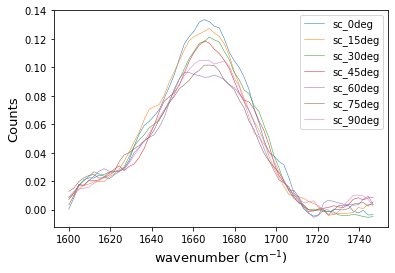

In [28]:
"""
Func: custmultiplot
Input: (folder directory:str, domain[x0:float, x1:float])
Output: Overlaid Raman spectra of all files in specified folder over specified domain
Returns: None
"""
custmultiplot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-14 Data/scpol2'
            , domain=[1600, 1750])

###########################################################################################################################

save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/plots/24-06-13', 'multisc_amI_NORMED')

## Normalized Multiplot

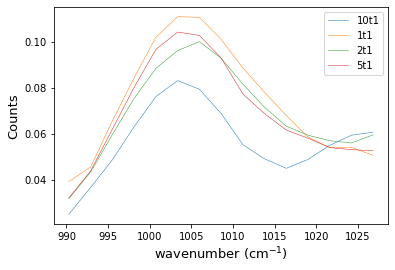

In [32]:
"""
Func: normplot
Input: (folder directory:str)
Output: Overlaid Raman spectra normalized to max peak (typically CH)
Returns: None
"""
custmultiplot('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-27/Ca_Assay'
            , domain=[990, 1030])

save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/Raman/2024-06-27/plots', 'normed_Ca_assay_ROI')

